In [3]:
#Import modules and load using pandas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("BankLoanApproval.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,IA35XVH6ZO,28,140466,163781,652,94,2,9.08,48,0.23,High School,Unemployed,Married,No,No,Education,No,0
1,Y8UETC3LSG,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
2,RM6QSRHIYP,41,23265,63527,829,87,4,9.73,60,0.45,Master's,Full-time,Divorced,Yes,No,Auto,Yes,0
3,GX5YQOGROM,53,117550,95744,395,112,4,3.58,24,0.73,High School,Unemployed,Single,No,No,Auto,Yes,0
4,X0BVPZLDC0,57,139699,88143,635,112,4,5.63,48,0.20,Master's,Part-time,Divorced,No,No,Home,No,0


In [3]:
df.describe()
#no missing value

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000,255327.000000
mean,43.498059,82500.225585,127579.236559,574.266125,59.542516,2.501036,13.492848,36.025896,0.500222,0.116118
std,14.990304,38963.150663,70841.308245,158.904496,34.643129,1.117021,6.636456,16.969297,0.230917,0.320367
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82467.000000,127557.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188986.500000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

In [5]:
#Preprocesing 
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [50]:
print(df.duplicated().any())

False


In [6]:
df.shape

(255327, 18)

<Axes: xlabel='Default', ylabel='count'>

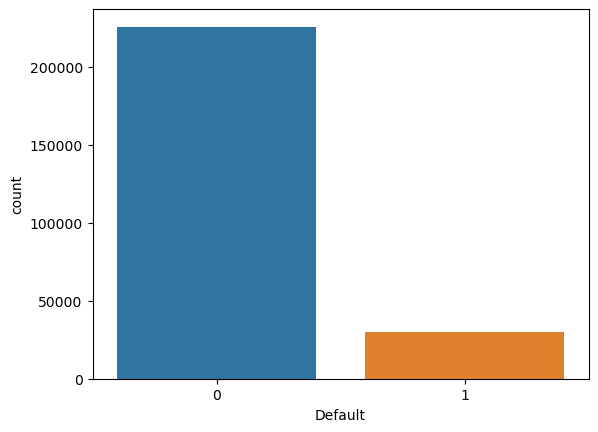

In [16]:
#Check whether we have imbalanced data or not
sns.countplot(x='Default', data=df)

<Axes: xlabel='Education', ylabel='count'>

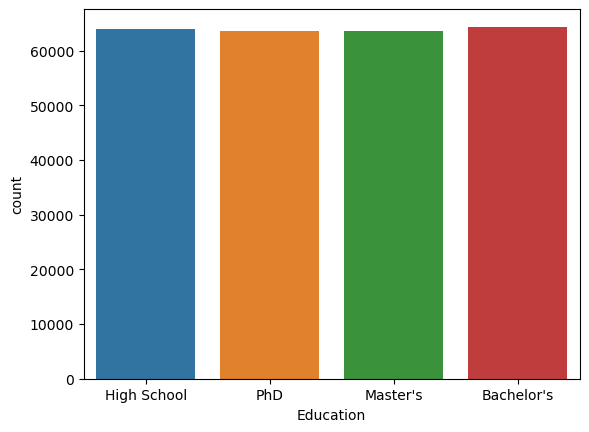

In [52]:
#EDA on categorical variables
sns.countplot(x='Education', data=df)

<Axes: xlabel='EmploymentType', ylabel='count'>

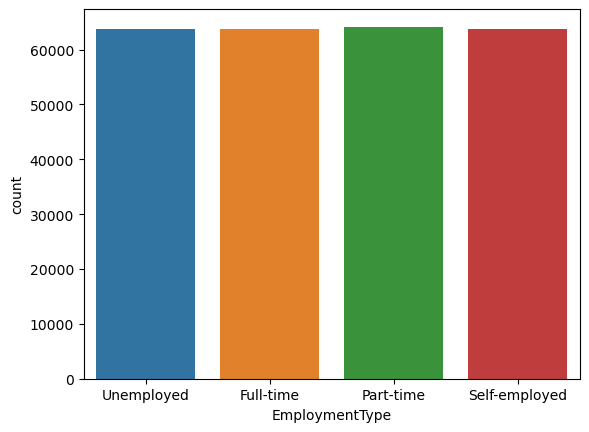

In [88]:
sns.countplot(x='EmploymentType', data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

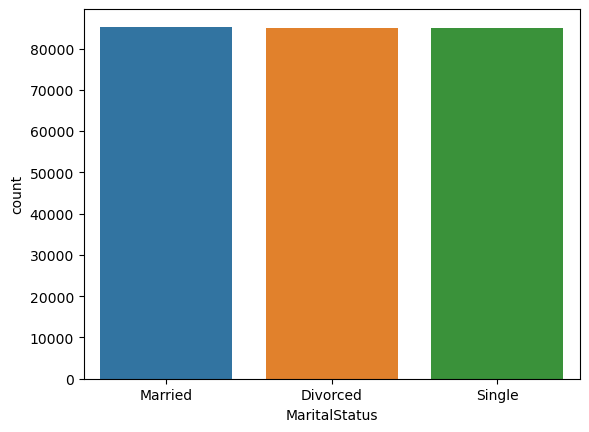

In [89]:
sns.countplot(x='MaritalStatus', data=df)

<Axes: xlabel='HasMortgage', ylabel='count'>

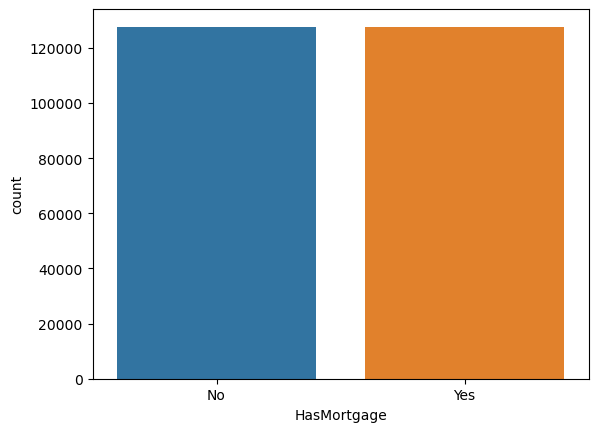

In [90]:
sns.countplot(x='HasMortgage', data=df)

<Axes: xlabel='HasDependents', ylabel='count'>

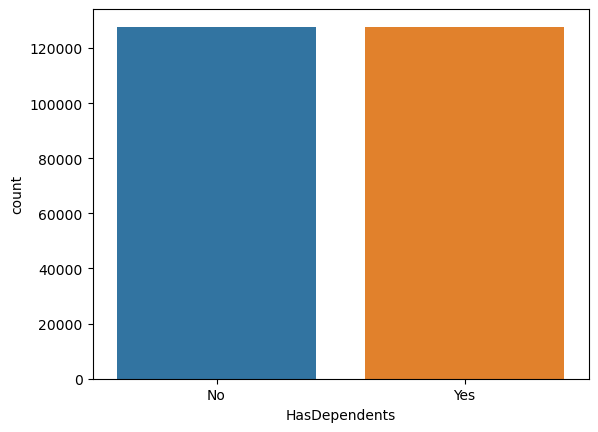

In [91]:
sns.countplot(x='HasDependents', data=df)

<Axes: xlabel='LoanPurpose', ylabel='count'>

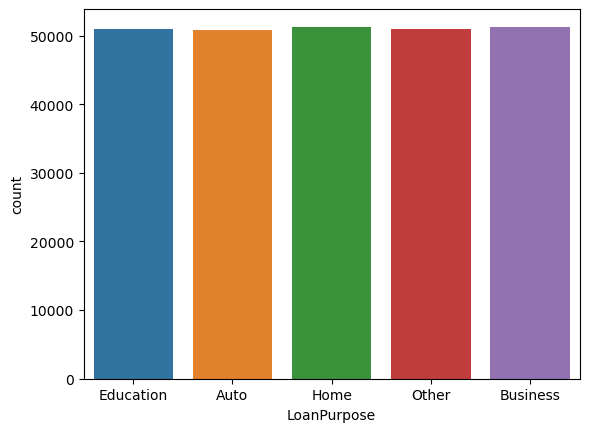

In [92]:
sns.countplot(x='LoanPurpose', data=df)

<Axes: xlabel='HasCoSigner', ylabel='count'>

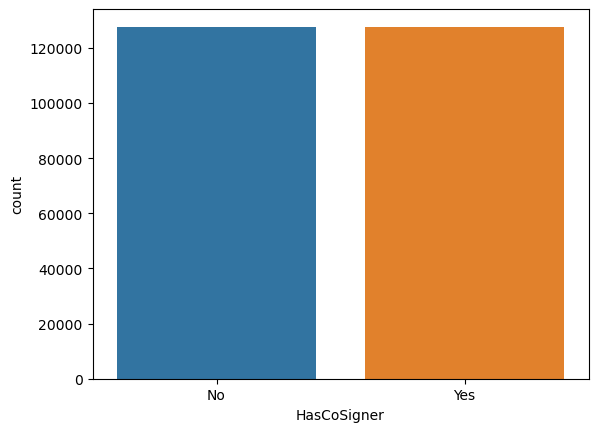

In [93]:
sns.countplot(x='HasCoSigner', data=df)

C:\Users\User\AppData\Local\Temp\ipykernel_26728\1663157343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

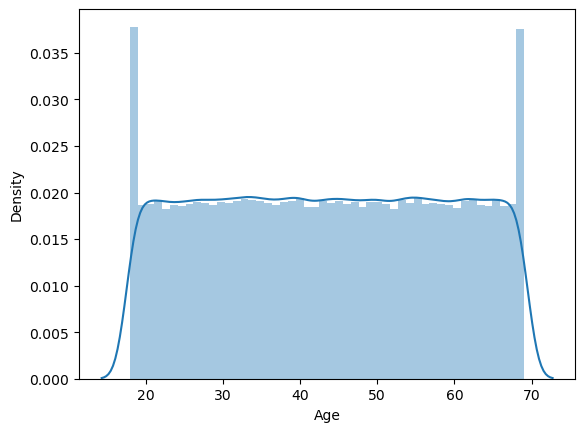

In [94]:
#EDA on numerical variables
sns.distplot(df['Age'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

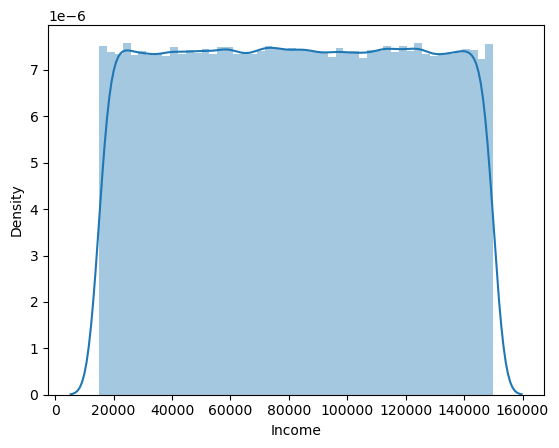

In [95]:
sns.distplot(df['Income'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

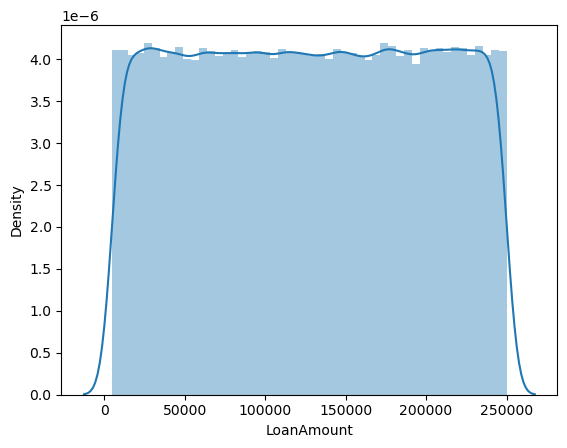

In [96]:
sns.distplot(df['LoanAmount'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\3364146939.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

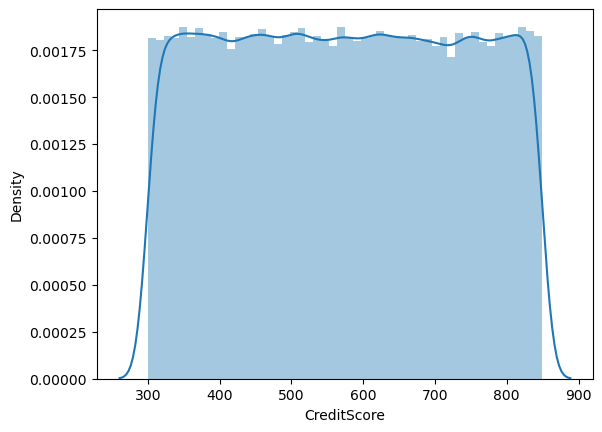

In [97]:
sns.distplot(df['CreditScore'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\289069781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthsEmployed'])


<Axes: xlabel='MonthsEmployed', ylabel='Density'>

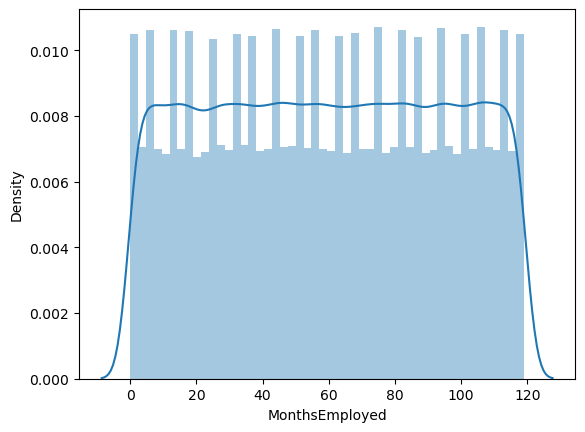

In [98]:
sns.distplot(df['MonthsEmployed'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\4158958955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumCreditLines'])


<Axes: xlabel='NumCreditLines', ylabel='Density'>

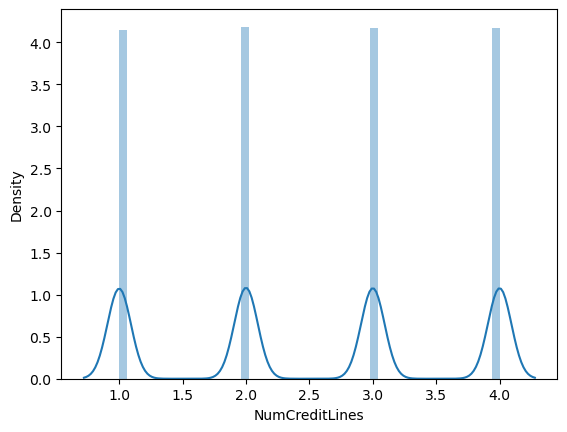

In [99]:
sns.distplot(df['NumCreditLines'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\2702472509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['InterestRate'])


<Axes: xlabel='InterestRate', ylabel='Density'>

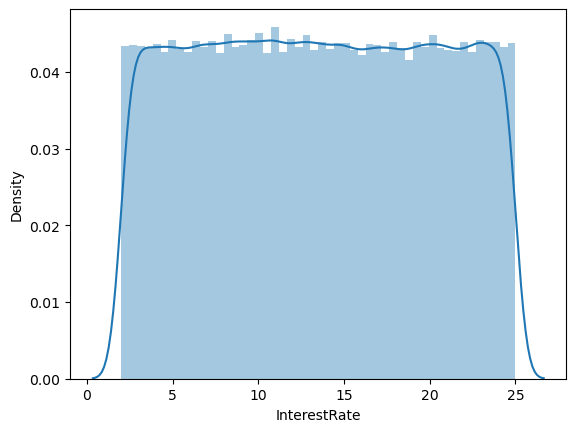

In [100]:

sns.distplot(df['InterestRate'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\478172532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanTerm'])


<Axes: xlabel='LoanTerm', ylabel='Density'>

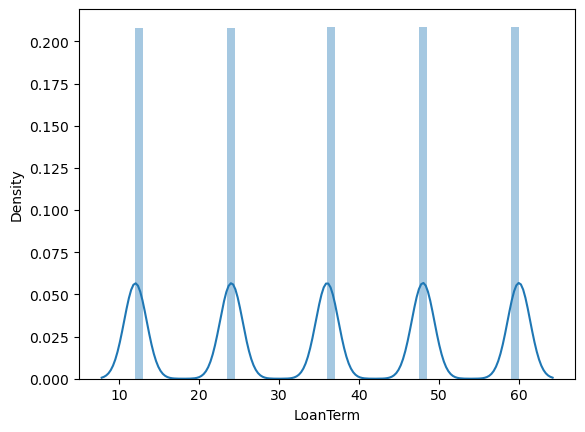

In [101]:
sns.distplot(df['LoanTerm'])

C:\Users\User\AppData\Local\Temp\ipykernel_26728\200273950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DTIRatio'])


<Axes: xlabel='DTIRatio', ylabel='Density'>

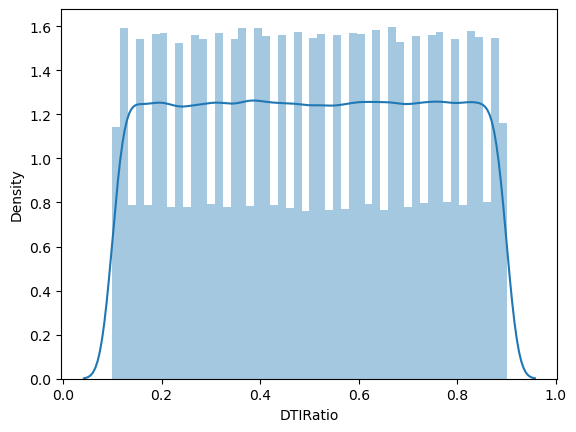

In [102]:
sns.distplot(df['DTIRatio'])

In [11]:
# Mapping the categorical to numerical 
# Selecting variables 
# Dropped the LoanID
# Define the mappings
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}

# Select the specified columns
selected_columns = df[["Age", "Income", "LoanAmount", "CreditScore", "DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage", "Default"]]

# Map the education column
selected_columns['Education'] = selected_columns['Education'].map(education_mapping)

# Map the employment column
selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)

# Map the marital status column
selected_columns['MaritalStatus'] = selected_columns['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
selected_columns['HasMortgage'] = selected_columns['HasMortgage'].map(mortgage_mapping)

df =selected_columns
df.head()

,Age,Income,LoanAmount,CreditScore,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,Default
0,28,140466,163781,652,0.23,NaN,NaN,NaN,NaN,0
1,28,149227,139759,375,0.80,NaN,NaN,NaN,NaN,1
2,41,23265,63527,829,0.45,NaN,NaN,NaN,NaN,0
3,53,117550,95744,395,0.73,NaN,NaN,NaN,NaN,0
4,57,139699,88143,635,0.20,NaN,NaN,NaN,NaN,0


<Axes: >

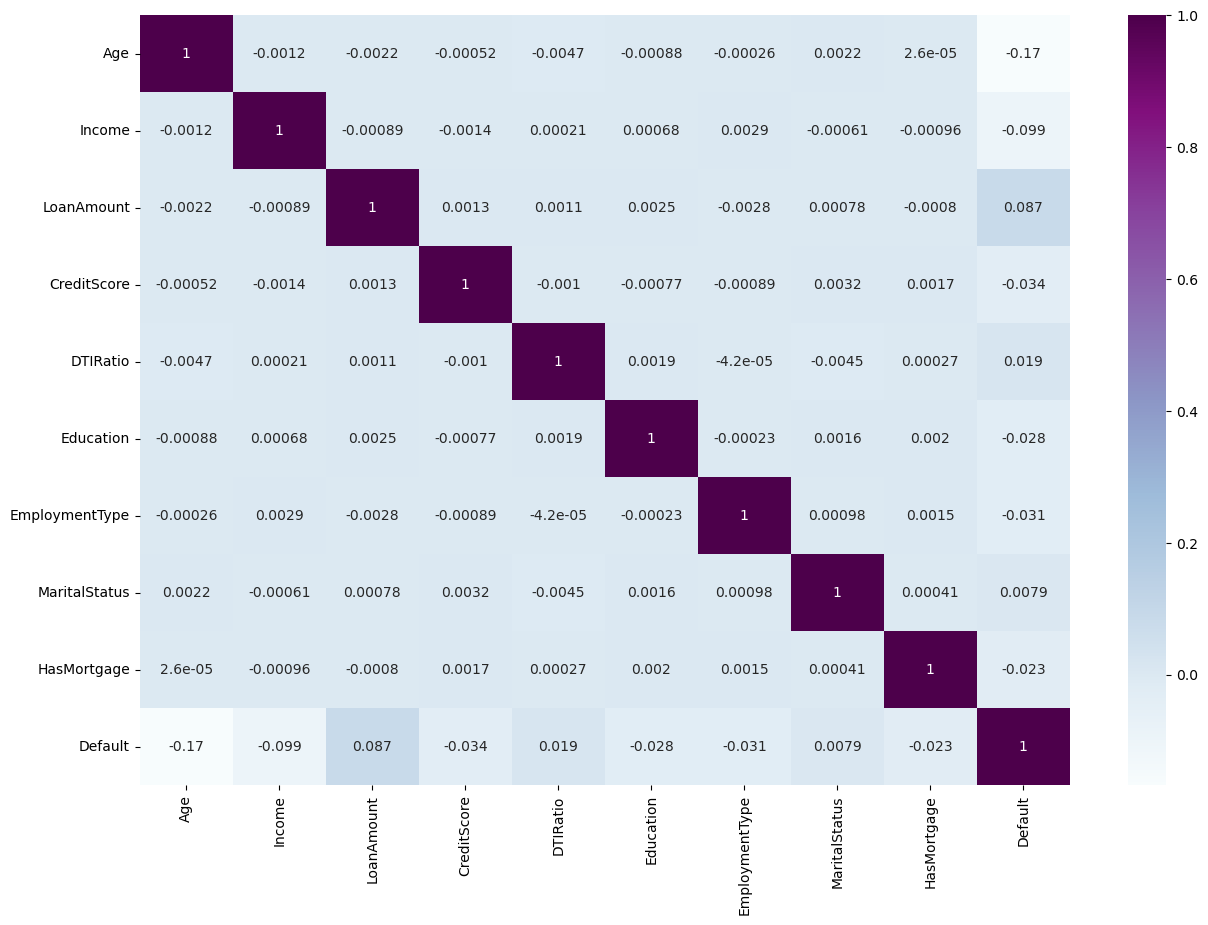

In [5]:
#Correlation Matrix
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot =True, cmap="BuPu")

In [9]:
#Train test Split
#specify input and output attributes
X = df.drop(columns=['Default'],axis=1)  # Features
y = df['Default']  # Target variable

In [10]:
# address with imbalanced class
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

ValueError: could not convert string to float: 'IA35XVH6ZO'

In [14]:
#splitting with ratio of training:testing = 70:30

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.3,stratify=y,random_state = 42)


In [12]:
#model training
from sklearn.model_selection import cross_val_score
def classify(model , x_train , y_train, y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    print("Accuracy :",accuracy_score(y_test,y_pred)*100)
    print("F1-score: ",f1_score(y_test,y_pred,average='weighted')*100)
    print("Confusion Matrix:\n ",confusion_matrix(y_test,y_pred))
    print("Classification report: \n", classification_report(y_test, y_pred))
    

In [9]:
import statsmodels.api as sm
#ols
x_train = sm.add_constant(x_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, x_train).fit()

# Print a summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Default   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1029.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:24:11   Log-Likelihood:                -45642.
No. Observations:              178728   AIC:                         9.130e+04
Df Residuals:                  178718   BIC:                         9.140e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3435      0.005     72.

In [15]:
# 1st supervised learning model: Logistic Regression

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

classify(LRmodel,x_train, y_train,y_test)

Accuracy : 88.38757686131673
F1-score:  82.93926673483695
Confusion Matrix:
  [[67704     0]
 [ 8895     0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     67704
           1       0.00      0.00      0.00      8895

    accuracy                           0.88     76599
   macro avg       0.44      0.50      0.47     76599
weighted avg       0.78      0.88      0.83     76599



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# 2nd supervised learning model: Decision Tree

from sklearn.tree import DecisionTreeClassifier
TREEmodel = DecisionTreeClassifier()
classify(TREEmodel,x_train,y_train,y_test)

Accuracy : 79.52323137377772
F1-score:  80.09458551379555
Confusion Matrix:
  [[59193  8465]
 [ 7220  1721]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     67658
           1       0.17      0.19      0.18      8941

    accuracy                           0.80     76599
   macro avg       0.53      0.53      0.53     76599
weighted avg       0.81      0.80      0.80     76599



In [15]:
# 3rd supervised learning model: Random Forest

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFmodel =RandomForestClassifier()
classify(RFmodel,x_train,y_train, y_test)

KeyboardInterrupt: 

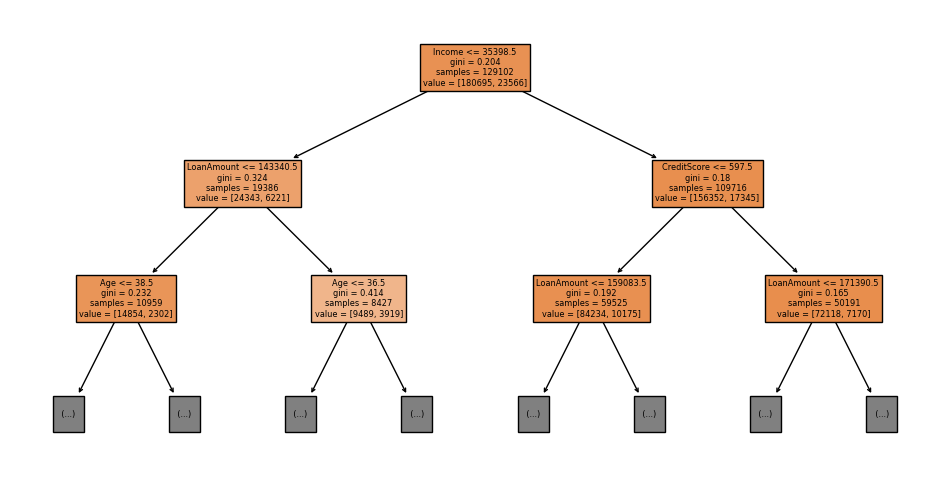

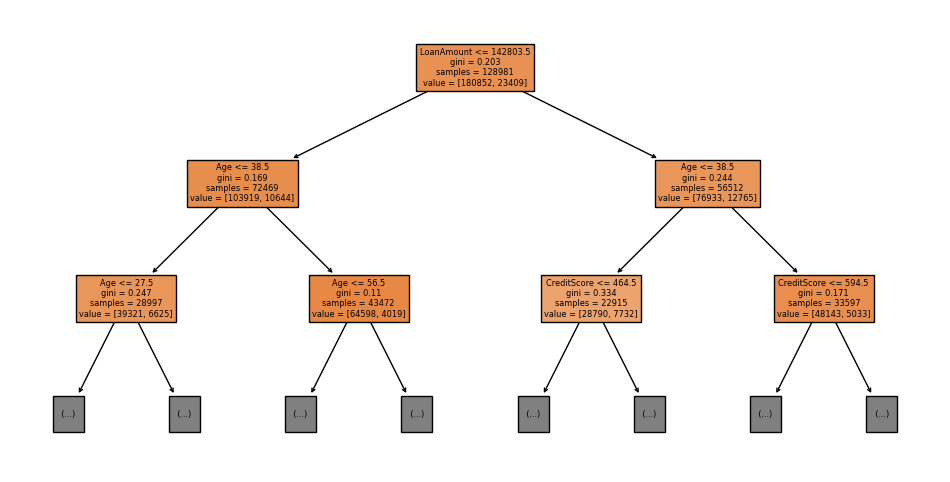

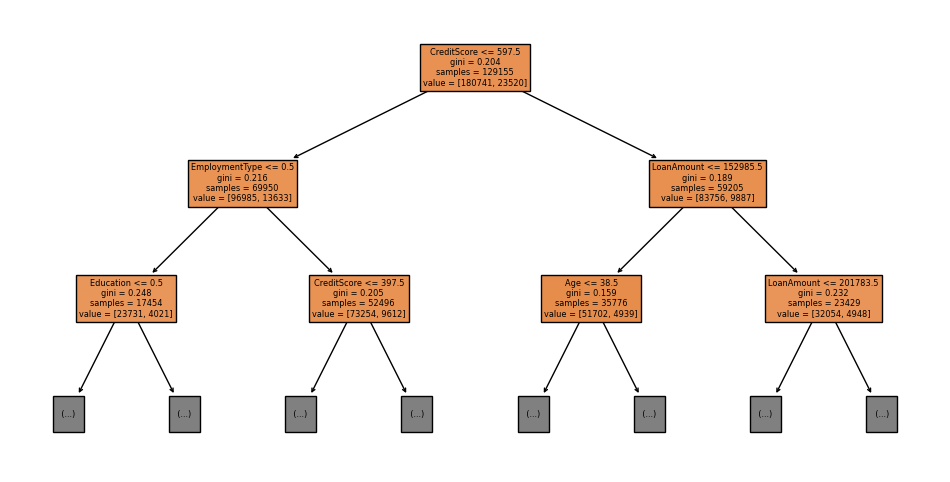

In [63]:
#Visualize the first 3 decision tree from the forest
# Export the first three decision trees from the forest

from sklearn.tree import plot_tree

for i in range(3):
    plt.figure(figsize=(12, 6))
    tree = RFmodel.estimators_[i]
    plot_tree(tree, feature_names=list(x_train.columns), filled=True, max_depth=2)
    plt.show()

In [ ]:
# 4th supervised learning model: Extra Tree Classifier

ETCmodel = ExtraTreesClassifier()
classify(ETCmodel,x_train,y_train,y_test)

Accuracy is 88.2211256021619
Cross validation is 88.33143386715963


In [124]:
#HyperParameter tuning
# original is  n_estimators= 25 , min_samples_split=25, max_depth=7, max_features=1
RFmodel_tuned =RandomForestClassifier(n_estimators= 50 , min_samples_split=50, max_depth=10, max_features=1)
classify(RFmodel_tuned,x_train,y_train,y_test)
#hyperParameter tuning 

Accuracy is 88.22895860259273
Cross validation is 88.39018202230993


In [16]:
#5th supervised learning model: Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
# we choose Gaussian Naive Bayes CLassifier since there are continuous
# variables suach as "Age","Income","Loan" & "CreditScore"

# Build a Gaussian Classifier
GNBmodel = GaussianNB()

# Model training
GNBmodel.fit(x_train, y_train)
classify(GNBmodel, x_train, y_train, y_test)

Accuracy : 88.32752385801382
F1-score:  82.85301384592081
Confusion Matrix:
  [[67658     0]
 [ 8941     0]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     67658
           1       0.00      0.00      0.00      8941

    accuracy                           0.88     76599
   macro avg       0.44      0.50      0.47     76599
weighted avg       0.78      0.88      0.83     76599



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#6th supervised learning model: XGBoost Classifier

from xgboost import XGBClassifier

XGBmodel = XGBClassifier()
classify(XGBmodel, x_train, y_train, y_test)

Accuracy : 88.39410436167574
F1-score:  83.76154916768995
Confusion Matrix:
  [[67336   322]
 [ 8568   373]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67658
           1       0.54      0.04      0.08      8941

    accuracy                           0.88     76599
   macro avg       0.71      0.52      0.51     76599
weighted avg       0.85      0.88      0.84     76599



In [23]:
#Hyperparamete tuning in order to optimize the XGBmodel's performance

from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBmodel, param_distributions=param_space, n_iter=20, cv=3, scoring='accuracy',n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [22]:
#hyperparameter tuned XGBosot model
XGBmodel_tuned = XGBClassifier(subsample = 1.0 , n_estimators = 100, max_depth = 5, learning_rate = 0.1, gamma = 0.1, colsample_bytree = 1.0 )

classify(XGBmodel_tuned, x_train,y_train,y_test)

Accuracy : 88.47243436598389
F1-score:  83.71432129850189
Confusion Matrix:
  [[67438   220]
 [ 8610   331]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     67658
           1       0.60      0.04      0.07      8941

    accuracy                           0.88     76599
   macro avg       0.74      0.52      0.50     76599
weighted avg       0.85      0.88      0.84     76599



In [125]:
import matplotlib.pyplot as plt

feature_importance = XGBmodel_tuned.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

NameError: name 'XGBmodel_tuned' is not defined

In [23]:
#7th supervised learning model: Support Vector Machine (SVM)

from sklearn.svm import SVC

SVMmodel = SVC(kernel='linear')
classify(SVMmodel, x_train,y_train,y_test)

In [1]:
#8th supervised learning model: Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDAmodel = LinearDiscriminantAnalysis()
classify(LDAmodel, x_train,y_train,y_test)

NameError: name 'classify' is not defined

In [ ]:
#9th supervised learning model: Quadratic Discriminant Analysis (QDA)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDAmodel = QuadraticDiscriminantAnalysis()
classify(QDAmodel, x_train,y_train,y_test)

In [47]:
#10th supervised learning model: Neural Network

from keras.models import Sequential
from keras.layers import Dense

# Initialize and build the neural network model
NNmodel = Sequential([
    Dense(10, input_shape=(9,), activation='relu'),
    Dense(3, activation='softmax')
])
NNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
NNmodel.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

print("\nNeural Network Model Summary:")
print(NNmodel.summary())

pred_y = NNmodel.predict(x_test)
report = classification_report(y_train, pred_y)

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268 (1.05 KB)

None


In [57]:
# Evaluate the model on the test data
f1_score, accuracy = NNmodel.evaluate(x_test, y_test)

print(f'Accuracy: {accuracy * 100}%')
print(f'F1-score: {f1_score * 100}%')


2394/2394 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8830 - loss: 0.3609
Accuracy: 88.32752108573914%
F1-score: 36.03653609752655%


In [71]:
#read the data we need to test on in NewApplicants.csv

df_new = pd.read_csv("NewApplicants.csv")
df_new.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,A01,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,NaN
1,A02,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,NaN
2,A03,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,NaN
3,A04,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,NaN
4,A05,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,NaN


In [72]:
#Preprocess the testing data

#remove the dependent variables from the new data frame
X_pred = df_new.drop(columns=['Default'],axis=1)


print(X_pred.isnull().sum())
print(X_pred.duplicated().any())
#there's no any missing value and duplicated value, therefore we can proceed

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64
False


In [73]:
#Mapping accordingly
education_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
employment_mapping = {'Unemployed': 0, 'Part-time': 1, 'Full-time': 2, 'Self-employed': 3}
marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
mortgage_mapping = {'Yes': 1, 'No': 0}

# Select the specified columns
selected_columns = X_pred[["Age", "Income", "LoanAmount", "CreditScore", "DTIRatio", 
                       "Education", "EmploymentType", "MaritalStatus", 
                       "HasMortgage"]]

# Map the education column
selected_columns['Education'] = selected_columns['Education'].map(education_mapping)

# Map the employment column
selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)

# Map the marital status column
selected_columns['MaritalStatus'] = selected_columns['MaritalStatus'].map(marital_mapping)

# Map the HasMortgage column
selected_columns['HasMortgage'] = selected_columns['HasMortgage'].map(mortgage_mapping)

X_pred = selected_columns
X_pred.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22748\3263074669.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Education'] = selected_columns['Education'].map(education_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_22748\3263074669.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['EmploymentType'] = selected_columns['EmploymentType'].map(employment_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_22748\3263074669.py:19: SettingWithCopyWarning: 
A value is tr

,Age,Income,LoanAmount,CreditScore,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage
0,56,85994,50587,520,0.44,1,2,2,1
1,69,50432,124440,458,0.68,2,2,1,0
2,46,84208,129188,451,0.31,2,0,2,1
3,32,31713,44799,743,0.23,0,2,1,0
4,60,20437,9139,633,0.73,1,0,2,0


In [74]:
#prediction using Logistic Regression
print("Prediction using Logistic Regression\n")

y_pred_LR = LRmodel.predict(X_pred)
for i in range(len(y_pred_LR)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_LR[i]))

Prediction using Logistic Regression

Candidate 1	0
Candidate 2	0
Candidate 3	0
Candidate 4	0
Candidate 5	0
Candidate 6	0
Candidate 7	0
Candidate 8	0
Candidate 9	0
Candidate 10	0
Candidate 11	0
Candidate 12	0
Candidate 13	0
Candidate 14	0
Candidate 15	0
Candidate 16	0
Candidate 17	0
Candidate 18	0
Candidate 19	0
Candidate 20	0


In [128]:
#prediction using Decision Tree
print("Prediction using Decision Tree\n")

y_pred_TREE = TREEmodel.predict(X_pred)
for i in range(len(y_pred_TREE)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_TREE[i]))

Prediction using Decision Tree

Candidate 1	0
Candidate 2	0
Candidate 3	1
Candidate 4	0
Candidate 5	0
Candidate 6	0
Candidate 7	1
Candidate 8	0
Candidate 9	0
Candidate 10	0
Candidate 11	1
Candidate 12	0
Candidate 13	0
Candidate 14	0
Candidate 15	0
Candidate 16	0
Candidate 17	1
Candidate 18	0
Candidate 19	0
Candidate 20	0


In [121]:
#prediction using Random Forest
print("Prediction using Random Forest\n")

y_pred_RF = RFmodel.predict(X_pred)
for i in range(len(y_pred_RF)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_RF[i]))

Prediction using Random Forest



NameError: name 'RFmodel' is not defined

In [122]:
#prediction using Extra Tree
print("Prediction using Extra Forest\n")

y_pred_ETC = ETCmodel.predict(X_pred)
for i in range(len(y_pred_ETC)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_ETC[i]))

Prediction using Extra Forest



NameError: name 'ETCmodel' is not defined

In [123]:
#prediction using Gaussian Naive Bayes
print("Prediction using Gaussian Naive Bayes\n")

y_pred_GNB = GNBmodel.predict(X_pred)
for i in range(len(y_pred_GNB)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_GNB[i]))

Prediction using Gaussian Naive Bayes

Candidate 1	0
Candidate 2	0
Candidate 3	0
Candidate 4	0
Candidate 5	0
Candidate 6	0
Candidate 7	0
Candidate 8	0
Candidate 9	0
Candidate 10	0
Candidate 11	0
Candidate 12	0
Candidate 13	0
Candidate 14	0
Candidate 15	0
Candidate 16	0
Candidate 17	0
Candidate 18	0
Candidate 19	0
Candidate 20	0


In [127]:
#prediction using XGBoost Classifier
print("Prediction using XGBoost Classifier\n")

y_pred_XGB = XGBmodel_tuned.predict(X_pred)
for i in range(len(y_pred_XGB)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_XGB[i]))

Prediction using XGBoost Classifier

Candidate 1	0
Candidate 2	0
Candidate 3	0
Candidate 4	0
Candidate 5	0
Candidate 6	0
Candidate 7	0
Candidate 8	0
Candidate 9	0
Candidate 10	0
Candidate 11	0
Candidate 12	0
Candidate 13	0
Candidate 14	0
Candidate 15	0
Candidate 16	0
Candidate 17	0
Candidate 18	0
Candidate 19	0
Candidate 20	0


In [ ]:
#prediction using SVM
print("Prediction using Support Vector Machine (SVM)\n")

y_pred_SVM = SVMmodel.predict(X_pred)
for i in range(len(y_pred_SVM)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_SVM[i]))

In [ ]:
#prediction using LDA
print("Prediction using Linear Discriminant Analysis (LDA)\n")

y_pred_LDA = LDAmodel.predict(X_pred)
for i in range(len(y_pred_LDA)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_LDA[i]))

In [ ]:
#prediction using QDA
print("Prediction using Quadratic Discriminant Analysis (QDA)\n")

y_pred_QDA = QDAmodel.predict(X_pred)
for i in range(len(y_pred_QDA)):
    print("Candidate " + str(i+1) + "\t" + str(y_pred_QDA[i]))

In [79]:
#prediction using Neural Network

# Assuming you have trained your NNmodel and have predictions
predictions = NNmodel.predict(X_pred)

# Get the index of the maximum value for each prediction as the predicted class
predicted_classes = predictions.argmax(axis=1)

# Print the predicted labels
for i in range(len(predicted_classes)):
    print("Candidate " + str(i+1) + "\t" + str(predicted_classes[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Candidate 1	0
Candidate 2	0
Candidate 3	0
Candidate 4	0
Candidate 5	0
Candidate 6	0
Candidate 7	0
Candidate 8	0
Candidate 9	0
Candidate 10	0
Candidate 11	0
Candidate 12	0
Candidate 13	0
Candidate 14	0
Candidate 15	0
Candidate 16	0
Candidate 17	0
Candidate 18	0
Candidate 19	0
Candidate 20	0
